# Song Classifier and Summarizer

## Table of Contents
* Section 1: Analytics problem definition
    * [Section 1.1: Background Information](#Section_11)
    * [Section 1.2: Objective](#Section_12)
    * [Section 1.3: Project use case](#Section_13) 
* Section 2: Implementation 
    * [Section 2.1: Data source](#Section_21)
    * [Section 2.2: Sentiment Analysis](#Section_22)
    * [Section 2.3: Topic Modeling](#Section_23)
    * [Section 2.4: Song Summarizer](#Section_24)
* Section 3: Results
    * [Section 3.1: Dashboard in Tableau](#Section_31)
* Section 4: Evaluation criteria for the implemented methods 
    * [Section 4.1: Metrics for evaluation](#Section_41)




## Section 1.1: Background Information: <a  id='Section_11'></a>

#### Do you ever feel “happy, free, confused and lonely at the same time?”  Well, In such case it's very hard to find songs that matches your current mood. There’s a lot of emotion in the songs —some positive, some negative, and some neutral. And this got us thinking: can we determine the overall mood of particular artists/albums with data? With topic modeling and sentiment analysis, it turns out we can.And since Taylor Swift has written songs since she was 16, I can also look at how her songwriting sentiment has changed.

## Section 1.2: Objective:  <a  id='Section_12'></a>

#### As modern music became diverse, understanding the sentiment, the music this lyric belongs to and the background of artist became harder. Understanding the sentiment and background is vital to fully appreciate the music. We aim to use natural language techniques such as sentimental analysis, topic modeling and lyric summarization to help people better understand and appreciate music.

## Section 1.3: Project use case:  <a  id='Section_13'></a>

RECOMMENDATION SYSTEM: It forms a basic step for building a strong recommendation system which could be further used for various applications

UNDERSTANDING DEMOGRAPHICS: On the fundamental level this would be a way of comprehending the things people hear and describe them to others

SOCIOLOGICAL RESEARCH: Results can be used to support sociological and psychological research into humans construct the notion of musical and similarity and form musical grouping

NEW ARTISTS / SONGS: Helpful in adding new artists/albums to established music streaming applications/software based on their genre.

# Section 2: Implementation:

## Section 2.1: Data source:  <a  id='Section_21'></a>

 Data will be sourced from the Kaggle database  (https://www.kaggle.com/datasets/deepshah16/song-lyrics-dataset)
 (Song Lyrics Dataset, n.d.)

In [1]:
import glob
import pandas as pd
import numpy as np

### Loading the Datasets

In [2]:
path = '/Users/arshithas/Documents/APAN/Sem2/NLP/NLP_project/Data/csv'

# csv files in the path
files = glob.glob(path + "/*.csv")

lyric_df = pd.DataFrame()
content = []

# getting all the csv files in the path
for filename in files:

  # reading content of csv file
  df = pd.read_csv(filename, index_col=None)
  content.append(df)

# converting content to data frame
lyric_df = pd.concat(content)
print(len(lyric_df))

6027


In [3]:
lyric_df.drop(['Unnamed: 0'], axis=1, inplace=True)
lyric_df.head()

,Artist,Title,Album,Year,Date,Lyric
0,Dua Lipa,New Rules,Dua Lipa,2017.0,2017-06-02,one one one one one talkin' in my sleep at n...
1,Dua Lipa,Don’t Start Now,Future Nostalgia,2019.0,2019-11-01,if you don't wanna see me did a full 80 craz...
2,Dua Lipa,IDGAF,Dua Lipa,2017.0,2017-06-02,you call me all friendly tellin' me how much y...
3,Dua Lipa,Blow Your Mind (Mwah),Dua Lipa,2016.0,2016-08-26,i know it's hot i know we've got something tha...
4,Dua Lipa,Be the One,Dua Lipa,2015.0,2015-10-30,i see the moon i see the moon i see the moon o...


In [4]:
for col in lyric_df.columns:
  print(col, sum(lyric_df[col].isna()))

Artist 0
Title 0
Album 1574
Year 1686
Date 1686
Lyric 46


In [5]:
# dropping entires with blank lyrics and album
lyric_df = lyric_df[-lyric_df['Lyric'].isna()]
# lyric_df = lyric_df[-lyric_df['Album'].isna()]

print(len(lyric_df))

5981


In [6]:
# Keeping rows with atleast 50 characters in lyric column
lyric_df = lyric_df[(lyric_df.Lyric.str.len() > 100)]

print(len(lyric_df))

5611


In [7]:
# Keeping only released songs
lyric_df = lyric_df[-(lyric_df['Album'] == 'Unreleased Songs')]

lyric_df['Title'] = lyric_df['Title'].str.lower()

# Dropping other than original songs
lyric_df = lyric_df[-lyric_df['Title'].str.contains("tour")]
lyric_df = lyric_df[-lyric_df['Title'].str.contains("remix")]
lyric_df = lyric_df[-lyric_df['Title'].str.contains("live")]
lyric_df = lyric_df[-lyric_df['Title'].str.contains("demo")]
lyric_df = lyric_df[-lyric_df['Title'].str.contains("#name?")]
lyric_df = lyric_df[-lyric_df['Title'].str.contains("edit")]
lyric_df = lyric_df[-lyric_df['Title'].str.contains("mix")]
lyric_df = lyric_df[-lyric_df['Title'].str.contains("quotes")]
lyric_df = lyric_df[-lyric_df['Title'].str.contains("cover")]
lyric_df = lyric_df[-lyric_df['Title'].str.contains("radio")]
lyric_df = lyric_df[-lyric_df['Title'].str.contains("tribute")]
lyric_df = lyric_df[-lyric_df['Title'].str.contains("studio")]
lyric_df = lyric_df[-lyric_df['Title'].str.contains("session")]
lyric_df = lyric_df[-lyric_df['Title'].str.contains("recording")]
lyric_df = lyric_df[-lyric_df['Title'].str.contains("acoustic")]
lyric_df = lyric_df[-lyric_df['Title'].str.contains("performance")]
lyric_df = lyric_df[-lyric_df['Title'].str.contains("the making of a song")]
lyric_df = lyric_df[-lyric_df['Title'].str.contains("vocal")]
lyric_df = lyric_df[-lyric_df['Title'].str.contains("album")]
lyric_df = lyric_df[-lyric_df['Title'].str.contains("itunes")]
lyric_df = lyric_df[-lyric_df['Title'].str.contains("snippet")]
lyric_df = lyric_df[-lyric_df['Title'].str.contains("mail box")]

print(len(lyric_df))

3625


In [8]:
lyric_df.drop(['Album', 'Year', 'Date'], axis=1, inplace=True)

In [9]:
lyric_df.head()

,Artist,Title,Lyric
0,Dua Lipa,new rules,one one one one one talkin' in my sleep at n...
1,Dua Lipa,don’t start now,if you don't wanna see me did a full 80 craz...
2,Dua Lipa,idgaf,you call me all friendly tellin' me how much y...
3,Dua Lipa,blow your mind (mwah),i know it's hot i know we've got something tha...
4,Dua Lipa,be the one,i see the moon i see the moon i see the moon o...


In [10]:
lyric_df[1:4]

,Artist,Title,Lyric
1,Dua Lipa,don’t start now,if you don't wanna see me did a full 80 craz...
2,Dua Lipa,idgaf,you call me all friendly tellin' me how much y...
3,Dua Lipa,blow your mind (mwah),i know it's hot i know we've got something tha...


In [11]:
lyric_df.to_csv('cleaneddata.csv', index=False, header=True)

## Section 2.2: Sentiment Analysis: <a  id='Section_22'></a>

In [12]:
import re

pattern = r'[0-9]'

# Match all digits in the string and replace them with an empty string
lyric_df['Lyric'] = lyric_df['Lyric'].apply(lambda row : re.sub(pattern, '', row))

In [13]:
# Function to check if a word is english

def isEnglish(s):
  try:
      s.encode(encoding='utf-8').decode('ascii')
  except UnicodeDecodeError:
      return False
  else:
      return True

# Function to retain alphanumeric and engligh words
def keep_alphanumeric_and_Eng(text):
  keep = []
  for word in text.split():
    if word.isalnum() and isEnglish(word):
      keep.append(word)
  return ' '.join(keep)

In [14]:
# Keeping only english words in Lyrics
lyric_df['Lyric'] = lyric_df['Lyric'].apply(lambda row : keep_alphanumeric_and_Eng(row))

In [15]:
# Getting Emotions for each song

from nrclex import NRCLex

nrc_values = []
for row in lyric_df.iterrows():
  nrc_values.append(NRCLex(text=row[1]['Lyric']).affect_frequencies)

# Dropping unwanted value
for nrc_value in nrc_values:
  nrc_value.pop('anticip')

# Normalize NRC Scores (Change to True if we want to Normalize)
TO_NORMALIZE = False

if TO_NORMALIZE:
  for nrc_value in nrc_values:
    total = sum(nrc_value.values)
    for k, v in nrc_value.items():
      nrc_value[k] = v / (total + 1e-6)

In [16]:
nrc_columns = list(nrc_values[0].keys())

In [17]:
# Getting the emotion scores for the songs

from collections import defaultdict as ddict

nrc_values_by_col = ddict(list)
for nrc_value in nrc_values:
  for k in nrc_columns:
    nrc_values_by_col[k].append(nrc_value.get(k, 0.0))

In [18]:
# Adding the emotion scores to the dataset

lyric_sentiments = lyric_df.copy()

for nrc_type, values in nrc_values_by_col.items():
  lyric_sentiments[nrc_type] = values
lyric_sentiments.head()

,Artist,Title,Lyric,fear,anger,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
0,Dua Lipa,new rules,one one one one one in my sleep at night mysel...,0.011364,0.045455,0.238636,0.011364,0.397727,0.056818,0.011364,0.022727,0.181818,0.022727
1,Dua Lipa,don’t start now,if you wanna see me did a full crazy thinking ...,0.169492,0.033898,0.169492,0.033898,0.084746,0.152542,0.152542,0.000000,0.033898,0.169492
2,Dua Lipa,idgaf,you call me all friendly me how much you miss ...,0.014286,0.028571,0.085714,0.028571,0.185714,0.228571,0.071429,0.128571,0.157143,0.071429
3,Dua Lipa,blow your mind (mwah),i know hot i know got something that money buy...,0.076923,0.134615,0.105769,0.028846,0.182692,0.182692,0.067308,0.009615,0.125000,0.086538
4,Dua Lipa,be the one,i see the moon i see the moon i see the moon o...,0.000000,0.000000,0.090909,0.090909,0.227273,0.204545,0.068182,0.068182,0.227273,0.022727


In [19]:
# Getting the average Artist emotions

artist_avg_emotions = lyric_sentiments.groupby('Artist').mean()
artist_avg_emotions

,fear,anger,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
Artist,,,,,,,,,,
Ariana Grande,0.073462,0.050354,0.082780,0.045490,0.216681,0.146811,0.074532,0.057271,0.160084,0.086165
BTS (방탄소년단),0.097866,0.053879,0.076034,0.040918,0.218631,0.139610,0.079862,0.041728,0.138047,0.082314
Beyoncé,0.074093,0.057547,0.095781,0.050420,0.214089,0.136901,0.079538,0.040168,0.150095,0.096963
Billie Eilish,0.105868,0.061410,0.083482,0.046746,0.151182,0.170142,0.116672,0.061782,0.098321,0.083987
Cardi B,0.101104,0.117277,0.072490,0.053548,0.120198,0.194273,0.093935,0.091985,0.064151,0.075414
Charlie Puth,0.081711,0.060248,0.081193,0.049230,0.206826,0.154398,0.095060,0.039014,0.145477,0.086844
Coldplay,0.092037,0.047314,0.095002,0.049751,0.204799,0.150089,0.096334,0.033545,0.118679,0.112450
Drake,0.071563,0.080868,0.111061,0.056942,0.183032,0.155358,0.071346,0.058782,0.101503,0.106968
Dua Lipa,0.082885,0.061356,0.091102,0.053281,0.188914,0.154407,0.090642,0.043789,0.125511,0.079125


In [20]:
artist_avg_emotions.describe()

,fear,anger,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.085969,0.067693,0.086866,0.051189,0.187385,0.161249,0.090527,0.051081,0.119375,0.090861
std,0.010923,0.020205,0.010504,0.005647,0.029318,0.019516,0.012987,0.016754,0.027343,0.011288
min,0.067495,0.047314,0.065841,0.040918,0.120198,0.136901,0.071346,0.033545,0.064151,0.071331
25%,0.080002,0.055482,0.081193,0.047032,0.162569,0.147386,0.080427,0.039624,0.101503,0.083963
50%,0.084231,0.061042,0.089407,0.049751,0.197038,0.154407,0.089565,0.043774,0.119885,0.086912
75%,0.092037,0.076168,0.093770,0.055689,0.208007,0.171279,0.095060,0.058782,0.139044,0.101200
max,0.107996,0.117277,0.111061,0.065001,0.223350,0.207975,0.116672,0.091985,0.160084,0.112450


## Section 2.3: Topic Modeling: <a  id='Section_23'></a>

In [21]:
#!pip install -U gensim
#!pip install -U pyLDAvis

In [22]:
#import required libraries
import random
import re
import pyLDAvis
import pyLDAvis.sklearn
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.stem.wordnet import WordNetLemmatizer
import json
from gensim.corpora.dictionary import Dictionary
import string

/Users/arshithas/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/arshithas/opt/anaconda3/lib/python3.9/site-packages/gensim/matutils.py:22: DeprecationWarning: Please use `triu` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.
  from scipy.linalg.special_matrices import triu


In [23]:
#import nltk with stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arshithas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/arshithas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/arshithas/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /Users/arshithas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
punctuation = list(set(string.punctuation))
stopwords = set(nltk.corpus.stopwords.words('english'))

In [26]:
lyric_df[1:3]

,Artist,Title,Lyric
1,Dua Lipa,don’t start now,if you wanna see me did a full crazy thinking ...
2,Dua Lipa,idgaf,you call me all friendly me how much you miss ...


In [27]:
# Define a function to clean up text
import re
from nltk.stem.wordnet import WordNetLemmatizer

def cleanup(text):
    text = " ".join([i for i in text.lower().split() if i not in stopwords])           # Remove stopwords
    text = "".join(re.sub(r'[^a-zA-Z ]', '', i) for i in text if i not in punctuation) # Keep only alphabetical characters
    text = [WordNetLemmatizer().lemmatize(i) for i in text.split()]                    # Lemmatize
    return text

In [28]:
Lyrics = lyric_df['Lyric'].apply(cleanup)
Lyrics[:10]

0    [one, one, one, one, one, sleep, night, crazy,...
1    [wanna, see, full, crazy, thinking, way, heart...
2    [call, friendly, much, miss, funny, guess, hea...
3    [know, hot, know, got, something, money, buy, ...
4    [see, moon, see, moon, see, moon, oh, looking,...
5    [always, one, say, first, goodbye, love, lose,...
6    [dua, lipa, falling, covered, blue, running, c...
7    [wanna, run, away, know, galaxy, take, ride, p...
8    [common, love, u, created, something, phenomen...
9    [ah, yeah, ah, yeah, call, devil, make, wanna,...
Name: Lyric, dtype: object

In [29]:
#Create a dictionary
dictionary = Dictionary(Lyrics) 
# Number of raw tokens
len(dictionary.items())

30550

In [30]:
# Filter out tokens that appear less than 5 times and more than 80% of the titles
dictionary.filter_extremes(no_below=5, no_above=0.8)
print(len(dictionary.items()))

6976


In [31]:
# Using the dictionary to convert titles into lists of tuples (index, count)
corpora = [dictionary.doc2bow(doc) for doc in Lyrics]

In [32]:
# LDA Model
### initialize and train an LDA model using the corpora from the above steps
### num_topics: number of topics
### id2word: dictionary to convert id to word
### passes: number of iterations

In [33]:
from gensim.models import ldamodel
lda_model = ldamodel.LdaModel(corpora, 
                              num_topics=5, 
                              id2word = dictionary, passes=50)

In [34]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpora, dictionary)
vis

/Users/arshithas/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/arshithas/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/arshithas/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/arshithas/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/arshithas/opt/anac

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.076135  0.027746       1        1  38.442363
3      0.099058  0.113072       2        1  26.047395
4      0.005568  0.136183       3        1  23.593131
2     -0.294837 -0.042864       4        1   5.976872
1      0.114075 -0.234137       5        1   5.940238, topic_info=      Term         Freq        Total Category  logprob  loglift
25    love  8378.000000  8378.000000  Default  30.0000  30.0000
83      oh  8377.000000  8377.000000  Default  29.0000  29.0000
651     la  2199.000000  2199.000000  Default  28.0000  28.0000
1     baby  5516.000000  5516.000000  Default  27.0000  27.0000
61    yeah  8949.000000  8949.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
246  dream   205.230119   954.172499   Topic5  -5.2680   1.2867
41     pre   227.527626  2307.603721   Topic5  -5.1649   0.5067
83      oh   244.443606  8377.926726   Topic5  -5.0932  -0.7110
70   could   217.641064  2693.677334   Topic5  -5.2093   0.3076
74    good   206.556026  1901.545385   Topic5  -5.2616   0.6036

[416 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3248      3  0.982992   account
755       1  0.019148  actually
755       2  0.947823  actually
755       5  0.028722  actually
3981      1  0.981505      adam
...     ...       ...       ...
630       3  0.688211     young
630       4  0.040616     young
630       5  0.009026     young
1254      3  0.106255       yuh
1254      4  0.890516       yuh

[834 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 5, 3, 2])

In [35]:
print(lda_model.print_topics(num_topics=6, num_words=5))

[(0, '0.027*"oh" + 0.024*"know" + 0.019*"love" + 0.018*"yeah" + 0.016*"baby"'), (1, '0.080*"love" + 0.021*"like" + 0.016*"one" + 0.012*"rihanna" + 0.011*"na"'), (2, '0.055*"la" + 0.022*"oh" + 0.021*"baby" + 0.020*"hey" + 0.017*"ya"'), (3, '0.018*"like" + 0.011*"get" + 0.010*"back" + 0.007*"never" + 0.007*"time"'), (4, '0.028*"like" + 0.023*"yeah" + 0.021*"got" + 0.017*"get" + 0.017*"bitch"')]


## Section 2.4: Song Summarizer: <a  id='Section_24'></a>

In [37]:
artist_words = {}

for artist in list(lyric_df.Artist.unique()):
    artist_words[artist] = ' '.join(lyric_df[lyric_df['Artist'] == artist]['Lyric'].to_list())

In [39]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
corpus = []
artists = []

for artist in artist_words:
    artists.append(artist)
    corpus.append(artist_words[artist])

artists = sorted(artists)

my_stop_words = set(stopwords.words('english'))

vectorizer = TfidfVectorizer(stop_words = my_stop_words)
vecs = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
dense = vecs.todense()
dtm_df = pd.DataFrame(dense.tolist(), columns=feature_names)

In [41]:
import nltk
from bs4 import BeautifulSoup
import string
from nltk.tokenize import RegexpTokenizer

In [42]:
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
#not is in the stopword list. W/O adding whitelist, the summary would change from "do not recommend" to "recommend". This solution was borrowed from bertcarremans https://github.com/bertcarremans/TwitterUSAirlineSentiment
whitelist = ["n't", "not", "no"]

In [43]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = {
"gotta": "got to", 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [44]:
#This two blocks of code was refered from https://www.kaggle.com/currie32/summarizing-text-with-amazon-reviews
def clean_text(text):

    # Replace contractions with longer forms in the above list
    if True:
        text = str(text).split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)

In [45]:
clean_summaries = []
for summary in lyric_df.Lyric:
    clean_summaries.append(clean_text(summary))
print("Lyrics are complete.")

print(len(clean_summaries))


clean_texts = []
for text in lyric_df.Title:
    clean_texts.append(clean_text(text))
print("Titles are complete.")
print(len(clean_texts))
clean_text

Lyrics are complete.
3625
Titles are complete.
3625


<function __main__.clean_text(text)>

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
#create a vocabulary of words, 
#ignore words that appear in 85% of documents, 
#eliminate stop words
docs=lyric_df.apply(lambda x: " ".join(x), axis=1).tolist()

cv=CountVectorizer(max_df=0.85,max_features=10000)
word_count_vector=cv.fit_transform(docs)
 
list(cv.vocabulary_.keys())[:700]

['dua',
 'lipa',
 'new',
 'rules',
 'one',
 'in',
 'my',
 'sleep',
 'at',
 'night',
 'myself',
 'crazy',
 'out',
 'of',
 'mind',
 'wrote',
 'it',
 'down',
 'read',
 'would',
 'save',
 'me',
 'too',
 'many',
 'times',
 'refrain',
 'love',
 'he',
 'makes',
 'feel',
 'like',
 'nobody',
 'else',
 'but',
 'so',
 'tell',
 'pre',
 'pick',
 'up',
 'phone',
 'know',
 'only',
 'drunk',
 'alone',
 'two',
 'let',
 'him',
 'have',
 'kick',
 'again',
 'three',
 'be',
 'his',
 'friend',
 'gonna',
 'wake',
 'bed',
 'morning',
 'if',
 'under',
 'over',
 'got',
 'count',
 'gotta',
 'them',
 'keep',
 'forwards',
 'keeps',
 'backwards',
 'nowhere',
 'turn',
 'no',
 'way',
 'now',
 'back',
 'from',
 'finally',
 'see',
 'pattern',
 'never',
 'learn',
 'do',
 'practice',
 'perfect',
 'still',
 'tryna',
 'by',
 'heart',
 'eat',
 'breathe',
 'repeat',
 'yeah',
 'whoa',
 'baby',
 'don',
 'start',
 'wanna',
 'did',
 'full',
 'thinking',
 'was',
 'heartbreak',
 'change',
 'maybe',
 'look',
 'where',
 'ended',
 'a

In [47]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [48]:
word_count_vector.shape

(3625, 10000)

In [49]:
# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights'])

/Users/arshithas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,idf_weights
me,1.179238
my,1.222385
in,1.223764
it,1.238708
that,1.297474
...,...
siz,8.502738
sizi,8.502738
guetta,8.502738
rana,8.502738


In [50]:
df3=lyric_df[['Lyric','Title']]

df3.tail()

,Lyric,Title
54,khalid put it in drive be outside be on the wa...,otw (burns version)
55,mm yeah mm yeah mm yeah yeah spend my days dow...,​wildflower (rough)
58,so still thinking of me just like i know you s...,young dumb
59,que melhor apenas acreditar nas teorias que a ...,khalid - vertigo (tradução português)
61,users considering a virus or malware must know...,khalid - better (official music video)


In [51]:
#https://github.com/kavgan/nlp-in-practice/blob/master/tf-idf/Keyword%20Extraction%20with%20TF-IDF%20and%20SKlearn.ipynb
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

In [52]:
def topn_from_vector(feature_names, sorted_items, topn=5):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []

    for idx, score in sorted_items:
        fname = feature_names[idx]
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [53]:
# you only needs to do this once, this is a mapping of index to 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
feature_names=cv.get_feature_names()
 
# get the document that we want to extract keywords from
doc=lyric_df['Lyric'][300]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform(doc))
 
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
 
#extract only the top n; n here is 10
keywords=topn_from_vector(feature_names,sorted_items,10)
 
# now print the results
print("\n=====Doc=====")
print(doc)
print("\n===Keywords===")
for k in keywords:
    print(k,keywords[k])


=====Doc=====
300    you had your chance to make me happy i had a d...
300    you love but i bet ya yo hine yeah here we goo...
300    proof yeah soul intent checking in number one ...
300    let them haters get the best of u all them hat...
300    so you lost your trust and you never should ha...
300    rihanna yeah yeah yeah yeah yeah yeah yeah yea...
Name: Lyric, dtype: object

===Keywords===
everynight 0.708
hard 0.598
yeah 0.531
they 0.516
proof 0.491
hatin 0.392
haters 0.367
ohhhhhh 0.354
soon 0.342
trust 0.34


/Users/arshithas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [56]:
keywords_df=pd.DataFrame(list(keywords.keys()))
keywords_df_tfidf=pd.DataFrame(list(keywords.values()))
frames=[keywords_df,keywords_df_tfidf]

In [57]:
keywords_all=pd.concat(frames, axis=1)
print(keywords_all)

            0      0
0  everynight  0.708
1        hard  0.598
2        yeah  0.531
3        they  0.516
4       proof  0.491
5       hatin  0.392
6      haters  0.367
7     ohhhhhh  0.354
8        soon  0.342
9       trust  0.340


In [58]:
str(lyric_df.iloc[148:149,2:3])

'                                                Lyric\n81  mmmm watch me hey woo one two three watch me i...'

## 3. Results

## 3.1: Dashboard in Tableau: <a  id='Section_31'></a>

We have developed a dashboard in tableau to visualize our results. 

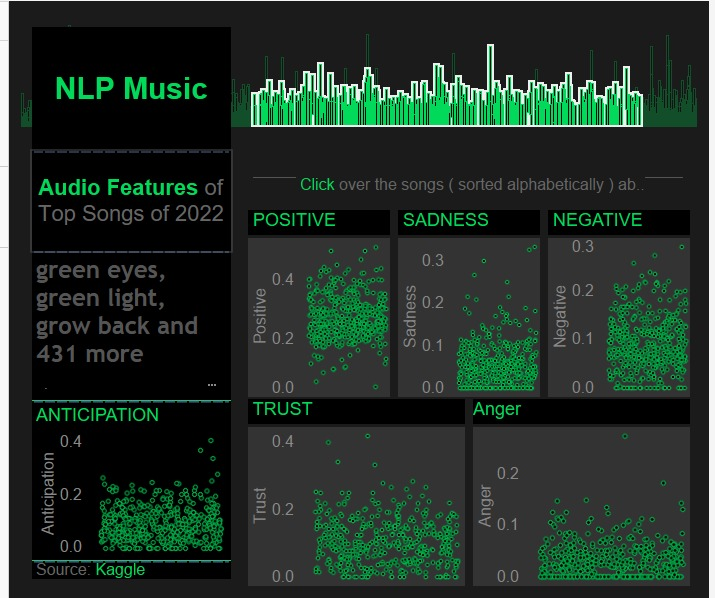

## 4. Evaluation criteria for the implemented methods 

## 4.1: Evaluation metric <a  id='Section_41'></a>

Since we are using NRC Lexicon to identify the emotions in each of the songs, we cannot directly use the classification metrics for the evaluation. Instead, we used the following two methods to evaluate the sentiment analysis:
1.   Manual Evaluation: Each team member picked 20 songs to go through and identify if the emotions orders are justified.
2.   Using Topic Modeling: Using topic modeling we identified different clusters for songs. We expected that songs with negative emotions are more likely to be clustered together.